<a href="https://colab.research.google.com/github/sanjib-sen/nlp/blob/master/Student_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.model_selection import KFold 

# Data Preprocessing



In [ ]:
df = pd.read_csv('student-por.csv')
df.shape

(649, 33)

In [ ]:
# Creaying Dataframe 


In [ ]:
# Counting and Dropping Null Values

df.isna().sum().sum()

0

In [ ]:
# Checking Duplicates

df[df.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [ ]:
# Labeling performance based on obtained marks

df.loc[(df.G3 >= 18) & (df.G3 <= 20), 'FinalGradeLabeled'] = 'Excellent'
df.loc[(df.G3 >= 15) & (df.G3 <= 17), 'FinalGradeLabeled'] = 'Good' 
df.loc[(df.G3 >= 11) & (df.G3 <= 14), 'FinalGradeLabeled'] = 'Satisfactory' 
df.loc[(df.G3 >= 6) & (df.G3 <= 10), 'FinalGradeLabeled'] = 'Poor' 
df.loc[(df.G3 >= 0) & (df.G3 <= 5), 'FinalGradeLabeled'] = 'Failure'

df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGradeLabeled
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Satisfactory
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Satisfactory
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Satisfactory
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Satisfactory
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,Satisfactory
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,Satisfactory
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,Satisfactory
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,15,16,17,Good
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,Satisfactory


In [ ]:
perc = (lambda col: col/col.sum())

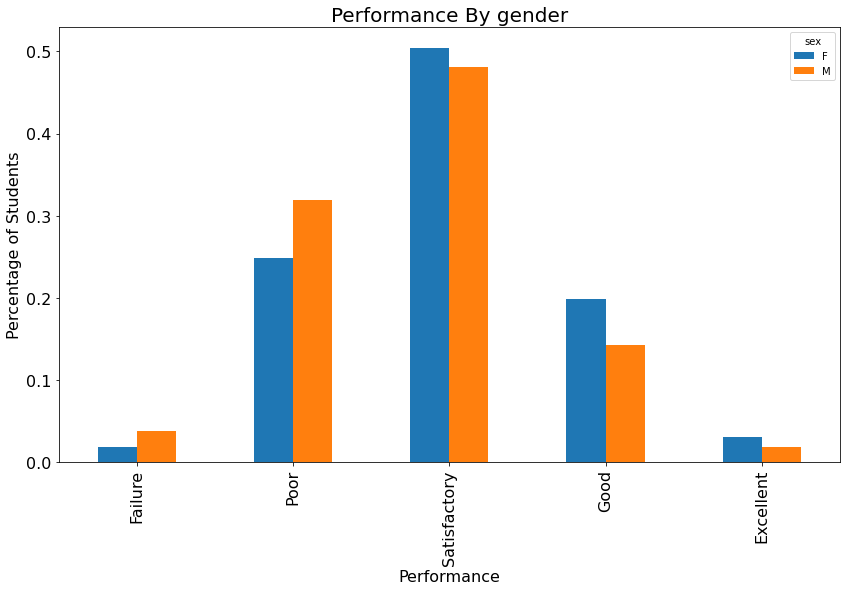

In [ ]:
index = ['Failure','Poor','Satisfactory','Good','Excellent']
gender_index = pd.crosstab(index=df.FinalGradeLabeled, columns=df.sex)
gender_index = gender_index.apply(perc).reindex(index)
gender_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Performance By gender', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Performance', fontsize=16)

plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

sex = pd.get_dummies(df.sex, prefix='sex')
df = df.join(sex)
# df = df.drop(["sex"], axis=1)
df.head(25)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,FinalGradeLabeled,sex_F,sex_M
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,4,0,11,11,Satisfactory,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,2,9,11,11,Satisfactory,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,6,12,13,12,Satisfactory,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,0,14,14,14,Satisfactory,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,0,11,13,13,Satisfactory,1,0
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,6,12,12,13,Satisfactory,0,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,13,12,13,Satisfactory,0,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,1,2,10,13,13,Satisfactory,1,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,1,0,15,16,17,Good,0,1
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,5,0,12,12,13,Satisfactory,0,1


In [ ]:
import math
def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = np.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            # use log from math and set base to 2
            entropy += prob * math.log(prob, 2)
    
    return -entropy


def calc_information_gain(data, split_name, target_name):

    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    #Find the unique values in the column
    values = data[split_name].unique()
    
    
    # Make two subsets of the data, based on the unique values
    left_split = data[data[split_name] == values[0]]
    right_split = data[data[split_name] == values[1]]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract


calc_information_gain(df, "sex", "G3")

0.026432394232207557

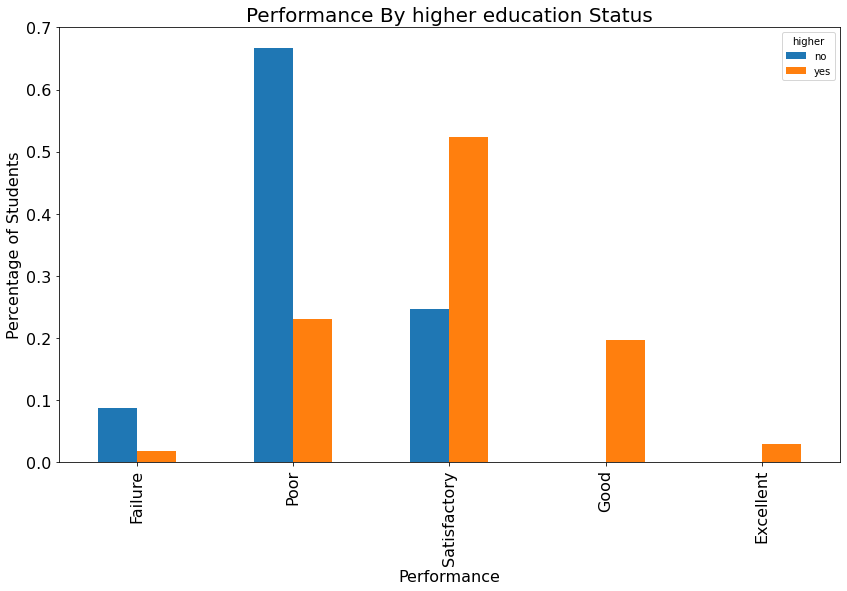

In [ ]:
higher_index = pd.crosstab(index=df.FinalGradeLabeled, columns=df.higher)
higher_index = higher_index.apply(perc).reindex(index)
higher_index.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Performance By higher education Status', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Performance', fontsize=16)

plt.show()

In [ ]:
calc_information_gain(df, "higher", "G3")

0.11425855352954084

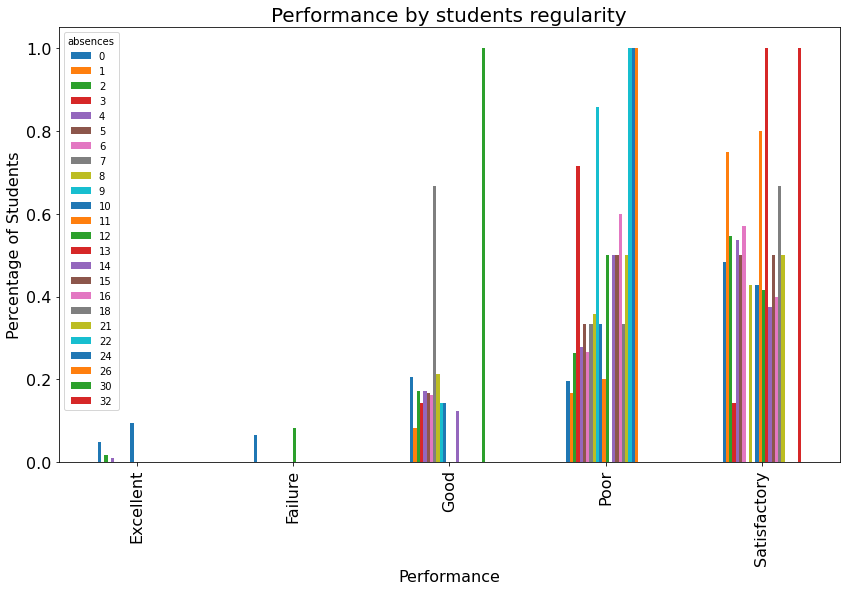

In [ ]:
absences = pd.crosstab(index=df.FinalGradeLabeled, columns=df.absences)
absences = perc(absences)
absences.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Performance by students regularity', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Performance', fontsize=16)
plt.show()

In [ ]:
df["absences"].describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

In [ ]:
df.loc[(df.absences >= 0) & (df.absences <= 4), 'RegularityLabeled'] = 'Always Regular'
df.loc[(df.absences >= 5) & (df.absences <= 9), 'RegularityLabeled'] = 'Mostly Regular' 
df.loc[(df.absences >= 10) & (df.absences <= 14), 'RegularityLabeled'] = 'Regular' 
df.loc[(df.absences >= 15) & (df.absences <= 19), 'RegularityLabeled'] = 'Irregular' 
df.loc[(df.absences >= 25)& (df.absences <= 32), 'RegularityLabeled'] = 'Highly Irregular'

df.head(25)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,FinalGradeLabeled,sex_F,sex_M,RegularityLabeled
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,4,0,11,11,Satisfactory,1,0,Always Regular
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,2,9,11,11,Satisfactory,1,0,Always Regular
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,6,12,13,12,Satisfactory,1,0,Mostly Regular
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,0,14,14,14,Satisfactory,1,0,Always Regular
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,0,11,13,13,Satisfactory,1,0,Always Regular
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,5,6,12,12,13,Satisfactory,0,1,Mostly Regular
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,3,0,13,12,13,Satisfactory,0,1,Always Regular
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,2,10,13,13,Satisfactory,1,0,Always Regular
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,0,15,16,17,Good,0,1,Always Regular
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,5,0,12,12,13,Satisfactory,0,1,Always Regular


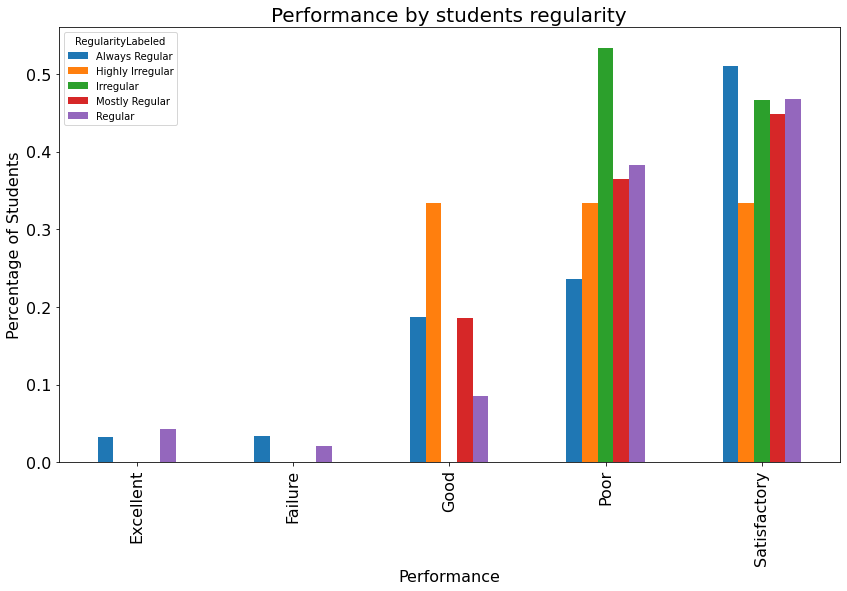

In [ ]:
absences = pd.crosstab(index=df.FinalGradeLabeled, columns=df.RegularityLabeled)
absences = perc(absences)
absences.plot.bar(fontsize=16, figsize=(14,8))
plt.title('Performance by students regularity', fontsize=20)
plt.ylabel('Percentage of Students', fontsize=16)
plt.xlabel('Performance', fontsize=16)
plt.show()

In [ ]:
calc_information_gain(df, "RegularityLabeled", "G3")

0.3800561008777317

In [ ]:
from xgboost import plot_importance, XGBClassifier
model=XGBClassifier(learning_rate=0.1,n_estimators=100)
column_headers = df.columns.values.tolist()
column_headers

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 'FinalGradeLabeled',
 'sex_F',
 'sex_M',
 'RegularityLabeled']

Feature: school, Score: 0.10418022272757854
Feature: sex, Score: 0.026432394232207557
Feature: age, Score: 1.7375954223444214
Feature: address, Score: 0.04173665216043698
Feature: famsize, Score: 0.014353262485061968
Feature: Pstatus, Score: 0.005364815690362068
Feature: Medu, Score: 1.8600285931886247
Feature: Fedu, Score: 1.904281448449956
Feature: Mjob, Score: 2.5707607559983243
Feature: Fjob, Score: 1.378502267823321
Feature: reason, Score: 1.6015402985099356
Feature: guardian, Score: 0.22819009958826042
Feature: traveltime, Score: 0.3978282900867427
Feature: studytime, Score: 1.383269165417277
Feature: failures, Score: 0.5763481728559716
Feature: schoolsup, Score: 0.03800856193970237
Feature: famsup, Score: 0.022475103176383016
Feature: paid, Score: 0.019088684970564262
Feature: activities, Score: 0.025095257933493986
Feature: nursery, Score: 0.017312641679540608
Feature: higher, Score: 0.11425855352954084
Feature: internet, Score: 0.028525248857280694
Feature: romantic, Score: 0.

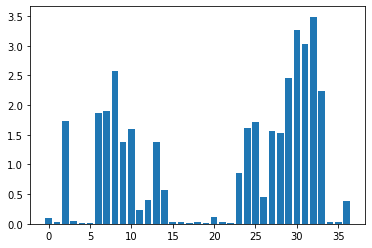

In [ ]:
information_gains = []
for i in column_headers:
    ig =  calc_information_gain(df, i, "G3")
    information_gains.append(ig)
    print('Feature: {}, Score: {}'.format(i,ig))


plt.bar([x for x in range(len(information_gains))], information_gains)
plt.show()